# Sign (phase) flip code

In this example, we examine specific type of error called a sign flip error, and how we can correct it using a quantum circuit known as the sign flip code, consisting of 3 qubit circuit that use 2 ancillary qubits to correct 1 qubit.

The sign flip is equivalent to a π radian rotation about the Z axis.

The logical qubit begin in the +|1> state, later we introduce error with the Pauli-Z gate, the circuit corrects the error returning the qubit to the +|1> state.

In [3]:
!pip install -q qiskit
!pip install -q pylatexenc # After installing, you may need to restart notebook kernel and rerun

In [15]:
from qiskit import *
from qiskit.tools.monitor import job_monitor

# For ibmq_qasm_simulator, change the backend to the following
#IBMQ.enable_account('ENTER API KEY HERE')
#provider = IBMQ.get_provider(hub='ibm-q')

backend = Aer.get_backend('aer_simulator')

q = QuantumRegister(3, 'q')
c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q, c)
circuit.x(q[0]) # Initilize the logical qubit to |1>, comment line for |0>.

# Encoding logical qubit onto the physical qubits
circuit.barrier(q)
circuit.cx(q[0], q[1])
circuit.cx(q[0], q[2])
circuit.h(q[0]) 
circuit.h(q[1])
circuit.h(q[2])

# Phase flip error
circuit.z(q[0]) 

# Decoding
circuit.h(q[0]) 
circuit.h(q[1])
circuit.h(q[2])
circuit.cx(q[0], q[1])
circuit.cx(q[0], q[2])
circuit.ccx(q[2], q[1], q[0])
circuit.barrier(q)

In [16]:
circuit.measure(q[0], c[0]) # Measurement

job = execute(circuit, backend)
job_monitor(job)
counts = job.result().get_counts()

print("\nSign flip code output")
print(counts)

Job Status: job has successfully run

Sign flip code output
{'1': 1024}


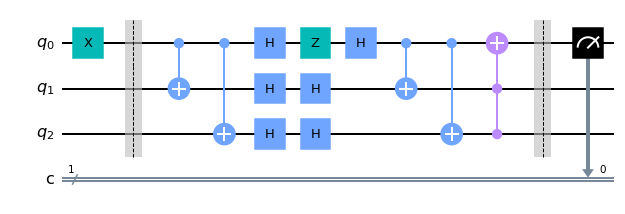

In [11]:
circuit.draw(output='mpl')